In [1]:
# Import libraries for data manipulation
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

# Import libraries for regression modeling
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

In [2]:
# Import data from csv file
original_data = pd.read_csv('../source_data/housing_data_cleaned.csv')


df = original_data.select_dtypes(exclude=object)
original_data.dtypes

id                             int64
basements                     object
building_code_description     object
category_code_description     object
census_tract                   int64
central_air                   object
depth                        float64
exempt_building                int64
exempt_land                    int64
exterior_condition             int64
fireplaces                     int64
frontage                     float64
fuel                          object
garage_spaces                  int64
garage_type                   object
geographic_ward                int64
interior_condition           float64
location                      object
market_value                   int64
market_value_date            float64
number_of_bathrooms            int64
number_of_bedrooms             int64
number_of_rooms                int64
number_stories                 int64
quality_grade                float64
sale_date                     object
sale_price                     int64
s

## Single Linear Regression

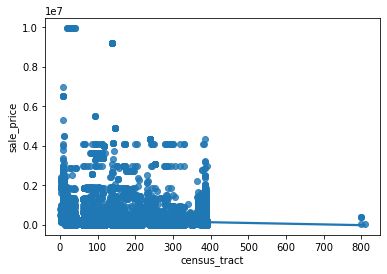

KeyboardInterrupt: 

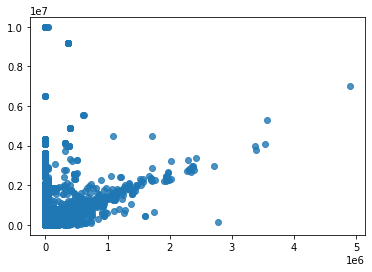

In [4]:
# Check which variables have a correlation with sale prices
for column in df.columns:
    if column != 'sale_price'and abs(df['sale_price'].corr(df[column]))>0.1:
        sns.regplot(data=df, x=column, y='sale_price')
        plt.show()

In [5]:
# Select categorical data values and reshape to arrays
X = df['total_livable_area'].values.reshape(-1,1)
y = df['sale_price'].values.reshape(-1, 1)

print(X.shape)
print(y.shape)

(68485, 1)
(68485, 1)


In [6]:
# Use train_test_split to create training and testing data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [7]:
# Create the model using LinearRegression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model

LinearRegression()

In [8]:
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

print(f"Training Score: {round(training_score, 2)}")
print(f"Testing Score: {round(testing_score, 2)}")

Training Score: 0.11
Testing Score: 0.09


In [9]:
# Make predictions with test data
predictions = model.predict(X_test)
predictions

array([[172926.83470058],
       [220624.77591583],
       [146827.96120544],
       ...,
       [209375.26147827],
       [137378.36907789],
       [231424.30977589]])

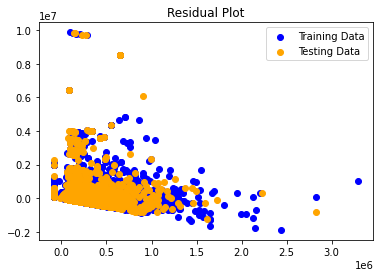

In [10]:
# Plot trained data and test data
plt.scatter(model.predict(X_train), y_train - model.predict(X_train), c="blue", label="Training Data")
plt.scatter(model.predict(X_test), y_test - model.predict(X_test), c="orange", label="Testing Data")
plt.legend()
plt.title("Residual Plot")
plt.show()

In [11]:
model.coef_

array([[224.99028875]])

## Multiple Linear Regression

In [12]:
data = df.copy()

In [13]:
# Select categorical data values and reshape to arrays
X = df.drop('sale_price', axis=1)
y = df['sale_price'].values.reshape(-1, 1)

print(X.shape)
print(y.shape)

(68485, 24)
(68485, 1)


In [14]:
# Use train_test_split to create training and testing data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [15]:
# Create the model using LinearRegression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model

LinearRegression()

In [16]:
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

print(f"Training Score: {round(training_score, 5)}")
print(f"Testing Score: {round(testing_score, 5)}")

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
model.coef_